In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from string import punctuation
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from smart_open import open
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import collections
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import joblib


tqdm.pandas()
%matplotlib inline

/Users/nehapawar/Desktop/neha/venv3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [13]:
train = pd.read_csv('../data/nlp_tweet_data/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
train.shape

(7613, 5)

In [15]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [16]:
test = pd.read_csv('../data/nlp_tweet_data/test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [17]:
test.shape

(3263, 4)

In [18]:
class_indexes = list(train['target'].value_counts().index)

In [19]:
all_data = train.append(test)

## Preprocessing

In [23]:
 def clean_text(text, remove_stopwords=True, stem_words=False, lemma=True):
    # Clean the text, with the option to remove stopwords and to stem words.

        text = str(text).lower().split()

        # Optionally, remove stop words
#         if remove_stopwords:
#             stops = set(stopwords.words("english"))
#             text = [w for w in text if not w in stops]

        text = " ".join(text)
        
        # remove URLs
        url = re.compile(r'https?://\S+|www\.\S+')
        text = url.sub(r'',text)
        
        # remove html tags
        text = re.sub(r'<.*?>', "", text)
        
        # remove emoji
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        
        
        text = emoji_pattern.sub(r'', text)
        
        # remove punctuation from text
        text  = "".join([char for char in text if char not in string.punctuation])

        # Clean the text
        text = re.sub(r"[-()\"#/<>!@&;*:<>{}`'+=~%|.!?,_]", " ", text)
        text = re.sub(r"\]", " ", text)
        text = re.sub(r"\[", " ", text)
        text = re.sub(r"\/", " ", text)
        text = re.sub(r"\\", " ", text)
        text = re.sub(r"\'ve", " have ", text)
        text = re.sub(r"can't", "cannot ", text)
        text = re.sub(r"n't", " not ", text)
        text = re.sub(r"\'re", " are ", text)
        text = re.sub(r"\'d", " would ", text)
        text = re.sub(r"\'ll", " will ", text)
        text = re.sub(r"  ", " ", text)
        text = re.sub(r"   ", " ", text)
        text = re.sub(r"   ", " ", text)
        text = re.sub(r"0x00", "", text)
        
        

        # Optionally, shorten words to their stems
        if stem_words:
            text = text.split()
            stemmer = SnowballStemmer('english')
            stemmed_words = [stemmer.stem(word) for word in text]
            text = " ".join(stemmed_words)

        if lemma:
            text = text.split()
            lem = WordNetLemmatizer()
            lemmatized = [lem.lemmatize(word,"v") for word in text]
            text = " ".join(lemmatized)

        # Return a list of words
        return(text)

In [24]:
all_data['text'] = all_data['text'].progress_apply(lambda x:clean_text(x))


100%|██████████| 10876/10876 [00:01<00:00, 9893.26it/s]


In [25]:
train['text'] = train['text'].progress_apply(lambda x:clean_text(x))


100%|██████████| 7613/7613 [00:00<00:00, 10651.57it/s]


In [26]:
test['text'] = test['text'].progress_apply(lambda x:clean_text(x))


100%|██████████| 3263/3263 [00:00<00:00, 10281.28it/s][A


## DOc2vec embedding

In [27]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(all_data['text'])]

In [28]:
tagged_data[1]

TaggedDocument(words=['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'], tags=['1'])

### Vocab building

In [29]:
max_epochs = 100
vec_size = 100
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1,
                workers=12)
  
model.build_vocab(tagged_data)

/Users/nehapawar/Desktop/neha/venv3/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


### Build Doc2vec model

In [30]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("tweet_doc2vec100.model")
print("Model Saved")

iteration 0


/Users/nehapawar/Desktop/neha/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [3]:
model= Doc2Vec.load("tweet_doc2vec100.model")
similar_doc = model.docvecs.most_similar('1')
print(similar_doc)

[('9591', 0.6279910802841187), ('9868', 0.6237337589263916), ('3559', 0.6229166984558105), ('7601', 0.6228505373001099), ('9869', 0.613094687461853), ('6404', 0.6118631958961487), ('4024', 0.6118152737617493), ('4374', 0.6099222898483276), ('8964', 0.6078821420669556), ('5287', 0.6076231002807617)]


## convert doc2vec vectors to dataframe

In [4]:
data_list =[]
for i in range(len(model.docvecs)):
    data_list.append(model.docvecs[i])

In [5]:
columns_name = [str(i) for i in range(len(model.docvecs[0]))]

In [6]:
d2v_df = pd.DataFrame.from_records(data_list,columns = columns_name)
d2v_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.061418,-0.658497,1.141718,0.362860,-0.301296,0.689475,-0.309432,-0.662339,-0.946257,-0.994770,...,-0.544082,0.882815,0.196985,0.963130,1.541587,-2.296058,-1.490150,0.050199,0.733693,-0.091885
1,-1.464768,-0.177376,0.287824,0.697856,-0.568696,-1.255014,1.256701,0.918978,0.004081,-1.072622,...,0.327433,-0.791861,-0.970982,0.281654,-0.614386,-1.861613,0.025999,-1.042492,1.319019,-0.986730
2,-1.929028,-1.917409,-0.757777,-0.104110,-0.966330,-0.910487,-3.479542,0.110322,1.149374,0.402792,...,-2.469684,-0.357296,-0.843963,2.351099,1.811956,-1.120807,-0.209483,0.300716,-2.371535,-1.376580
3,0.315675,-0.693003,-0.073327,0.324613,-0.344630,-1.148678,0.985929,0.707743,0.643048,-1.623439,...,-0.110355,0.389682,-0.887516,1.045496,1.369216,-1.408472,1.348342,-1.010036,-0.205508,0.039418
4,-1.415022,1.635497,2.423945,-1.695841,-1.611031,-1.438862,-0.911103,1.775517,0.194402,-0.935757,...,1.183218,0.792407,-0.939738,0.004032,-1.177880,2.408663,-0.145930,-1.377579,0.458585,-0.670303


In [7]:
d2v_df.shape

(10876, 100)

## train test split

In [36]:
train_new=d2v_df[:train.shape[0]]
test_new=d2v_df[train.shape[0]:]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(train_new, train['target'])
print('train shape: ',x_train.shape)
print('test shape: ',x_test.shape)

train shape:  (5709, 100)
test shape:  (1904, 100)


In [38]:
print("train_y label count: ",collections.Counter(y_train))
print("valid_y label count: ",collections.Counter(y_test))

train_y label count:  Counter({0: 3283, 1: 2426})
valid_y label count:  Counter({0: 1059, 1: 845})


## ML models

In [39]:
class MyClassifier(BaseEstimator):

    def __init__(self, classifier_type):
        """
        A Custome BaseEstimator that can switch between classifiers.
        :param classifier_type: string - The switch for different classifiers
        """
        self.classifier_type = classifier_type


    def fit(self, X, y=None):
        if self.classifier_type == 'LDA':
            self.classifier_ = LinearDiscriminantAnalysis(solver='svd')
        elif self.classifier_type == 'Logistic Regression':
            self.classifier_ = LogisticRegression(C=1.0, dual= False, max_iter=500,penalty = 'l2' , 
                                                  solver = 'liblinear', class_weight='balanced', 
                                                  multi_class='ovr', random_state=42, tol=1e-05)
        elif self.classifier_type == 'LinSVC':
            self.classifier_ = svm.LinearSVC(C=1.0, dual= False, fit_intercept=True,
     intercept_scaling =0.1, max_iter=1000,penalty = 'l2' , loss = 'squared_hinge', class_weight='balanced',
     multi_class='ovr', random_state=42, tol=1e-05, verbose=0)
        elif self.classifier_type == 'Random Forest':
            self.classifier_ = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
        elif self.classifier_type == 'Decision Tree':
            self.classifier_ = DecisionTreeClassifier()
        elif self.classifier_type == 'Gradient boost':
            self.classifier_ = GradientBoostingClassifier(n_estimators=50)
        else:
            raise ValueError('Unkown classifier type.')
        self.classifier_.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.classifier_.predict(X)
    

In [41]:
def performance_plots(y_test_sample, y_pred, ml_algo):
    print("---------"+ml_algo+"-----------")
    acc = metrics.accuracy_score(y_pred, y_test_sample)
    print("Accuracy: ",acc)
    f1_val = f1_score(y_test_sample, y_pred)
    print('f1 score:',f1_val)
    print("NORMALISED CM  for Tag6")
    cm = confusion_matrix(y_test_sample,y_pred)
    norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
    ind = class_indexes
    cols = class_indexes
    cm_df = pd.DataFrame(norm_cm,cols,ind)
    plt.figure(figsize=(22,10)) 
    sns.heatmap(cm_df, annot=True,cmap = "Greens",fmt='g')
    print(classification_report(y_test_sample,y_pred))
    print(accuracy_score(y_test_sample, y_pred))
    return

## LDA model

In [42]:
lda_model = MyClassifier('LDA')
lda_model.fit(x_train, y_train)
lda_pred = lda_model.predict(x_test)

---------LDA-----------
Accuracy:  0.6848739495798319
f1 score: 0.6021220159151193
NORMALISED CM  for Tag6
              precision    recall  f1-score   support

           0       0.68      0.80      0.74      1059
           1       0.68      0.54      0.60       845

    accuracy                           0.68      1904
   macro avg       0.68      0.67      0.67      1904
weighted avg       0.68      0.68      0.68      1904

0.6848739495798319


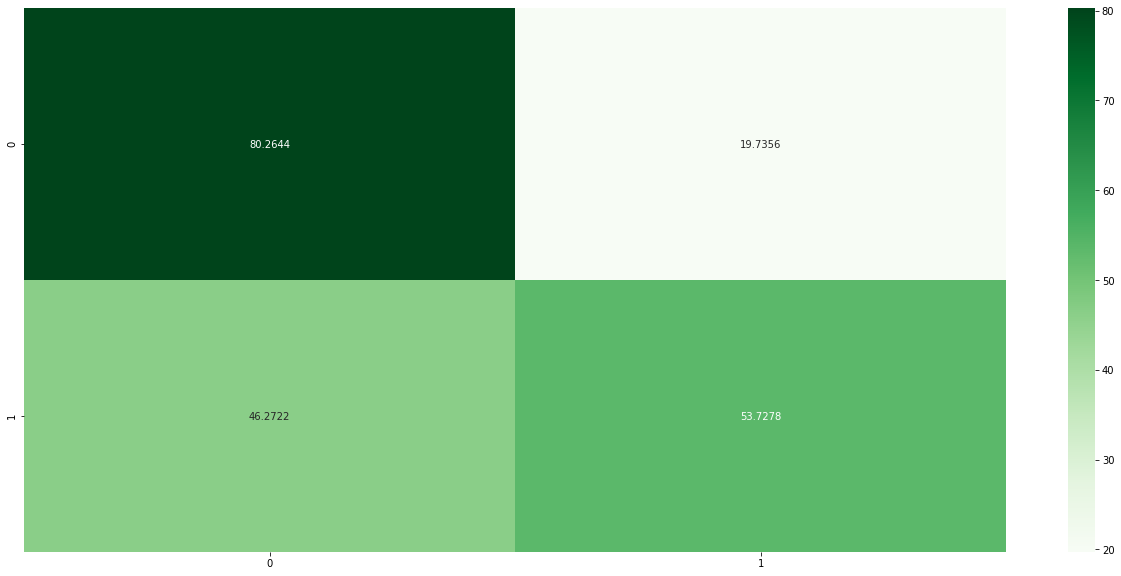

In [43]:
performance_plots(y_test, lda_pred, 'LDA')

## SVM

In [44]:
svm_model = MyClassifier('LinSVC')
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)

---------LinSVC-----------
Accuracy:  0.6832983193277311
f1 score: 0.6595143986448335
NORMALISED CM  for Tag6
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1059
           1       0.63      0.69      0.66       845

    accuracy                           0.68      1904
   macro avg       0.68      0.68      0.68      1904
weighted avg       0.69      0.68      0.68      1904

0.6832983193277311


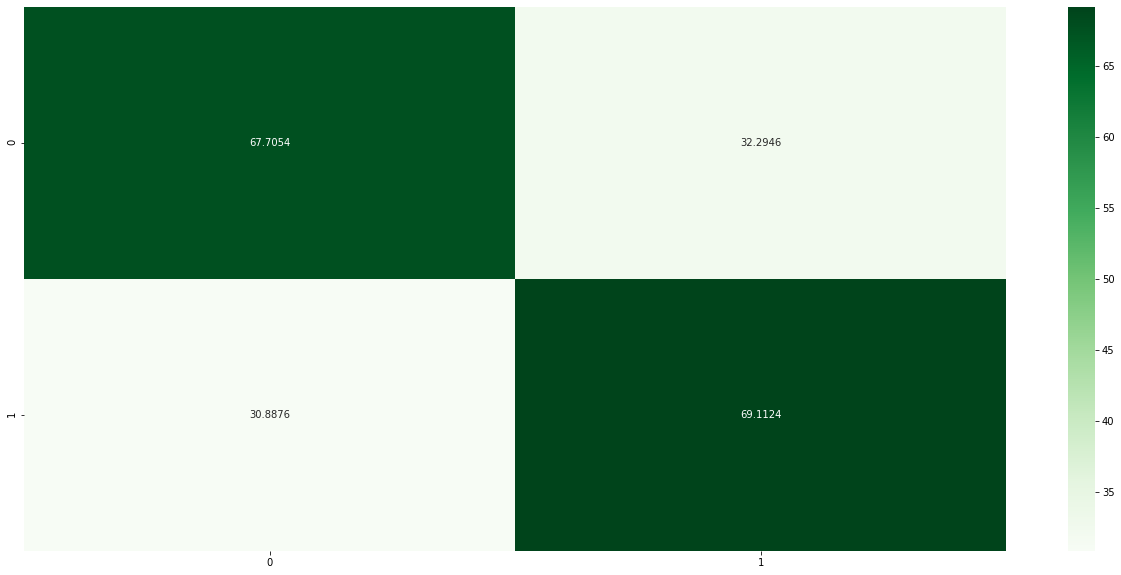

In [45]:
performance_plots(y_test, svm_pred, 'LinSVC')